# pylimons: Python Linac MOdeling aNd Simulation

## Utils

In [1]:
import utils

In [3]:
utils.h

6.62607015e-34

In [4]:
from utils import physical_constants as pconstants

In [5]:
pconstants.c

299792458.0

In [6]:
pconstants.m_e

0.51099895

## Beam

### Particle Class

In [7]:
from beam import Particle

In [8]:
particle = Particle('electron', 10)

In [9]:
particle.get_gamma()

20.569511835591836

In [10]:
particle.get_momentum()

9.98693546955716

In [11]:
particle.print_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [12]:
particle.update_energy(20)

In [13]:
particle.print_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 20 MeV
particle momentum : 19.99347093611059 MeV/c
particle gamma    : 40.13902367118367
particle beta     : 0.9996896128022548


### Bunch Class

In [14]:
from beam import Bunch

In [15]:
twiss_x = [-1.5, 10, 10]
twiss_y = [1.5, 10, 10]

#Bunch(sepcies, energy, dimension, num_particles, twiss_x, twiss_y)

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [16]:
particles = bunch.generate_transverse_matched_beam_distribution()
print (particles.shape)

(4, 10000)


In [17]:
bunch.particle.print_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [18]:
bunch.print_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 10 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 10 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312


In [19]:
x = particles[0,:]
xp = particles[1,:]

In [20]:
from matplotlib import pyplot as plt

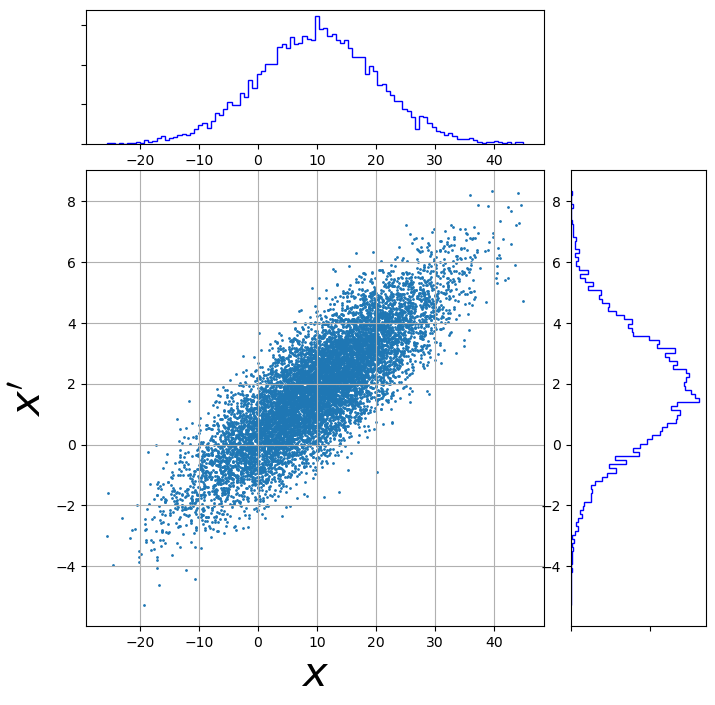

In [21]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')
        
plt.show()

## Elements

### Element Class (Parent Class)

In [22]:
from elements import Element

In [23]:
quad = Element("qf", "quadrupole", 0.2, 20)

In [24]:
quad.print_properties()

element name     : qf
element type     : quadrupole
element length   : 0.2
element strength : 20


In [25]:
quad2 = quad.element_copy("quad2")

In [26]:
quad2.set_element_property(length=0.4)

In [27]:
quad2.get_element_property("length")

The element's length is 0.4


In [28]:
quad2.print_properties()

element name     : quad2
element type     : quadrupole
element length   : 0.4
element strength : 20


### Drift Class (Child Class)

In [29]:
from elements import Drift

In [30]:
d10 = Drift("d10", "drift", 10)

In [31]:
d10.print_properties()

element name     : d10
element type     : drift
element length   : 10
element strength : 0


In [32]:
d10.set_element_property(length=20)
d10.get_element_property("length")

The element's length is 20


In [34]:
mat = d10.get_transfer_matrix()
print (mat)

[[ 1. 20.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. 20.]
 [ 0.  0.  0.  1.]]


In [35]:
new_particles = d10.propagate(particles)

In [37]:
print (mat.shape, particles.shape)

(4, 4) (4, 10000)


In [38]:
new_particles.shape

(4, 10000)

In [39]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

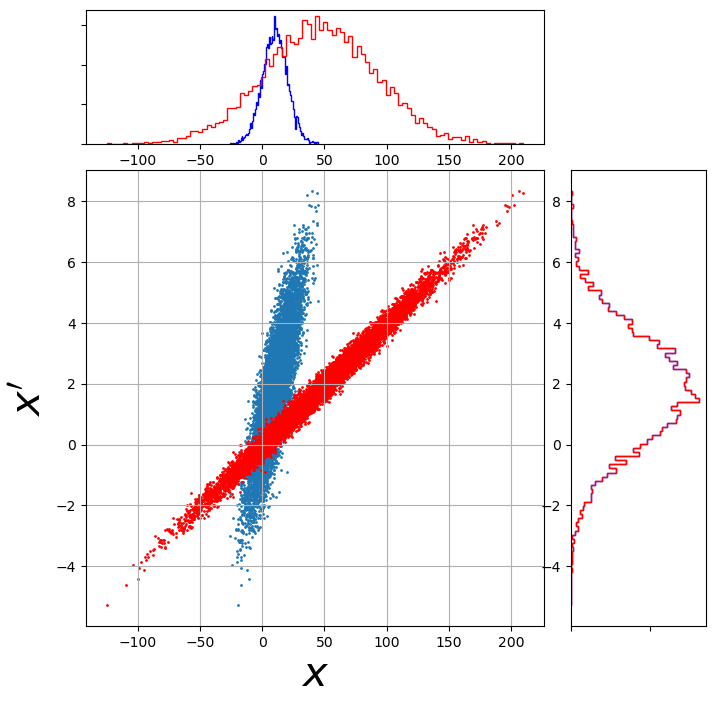

In [40]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()